In [1]:
import scanpy as sc

import sys
sys.path.append("../")

In [2]:
import echidna as ec
ec.pl.activate_plot_settings()

In [3]:
adata = sc.read_h5ad("data/F01_echidna.h5")

In [4]:
ec.tl.infer_cnv(adata)

2024-07-19 00:08:55,294 | INFO : `genome` not set, defaulting to hg38cytoBands and wgEncodeGencodeCompV46.
2024-07-19 00:09:22,733 | INFO : Added `.uns['echidna']['save_data']['infer_cnv']` : Path to CNV inference results.


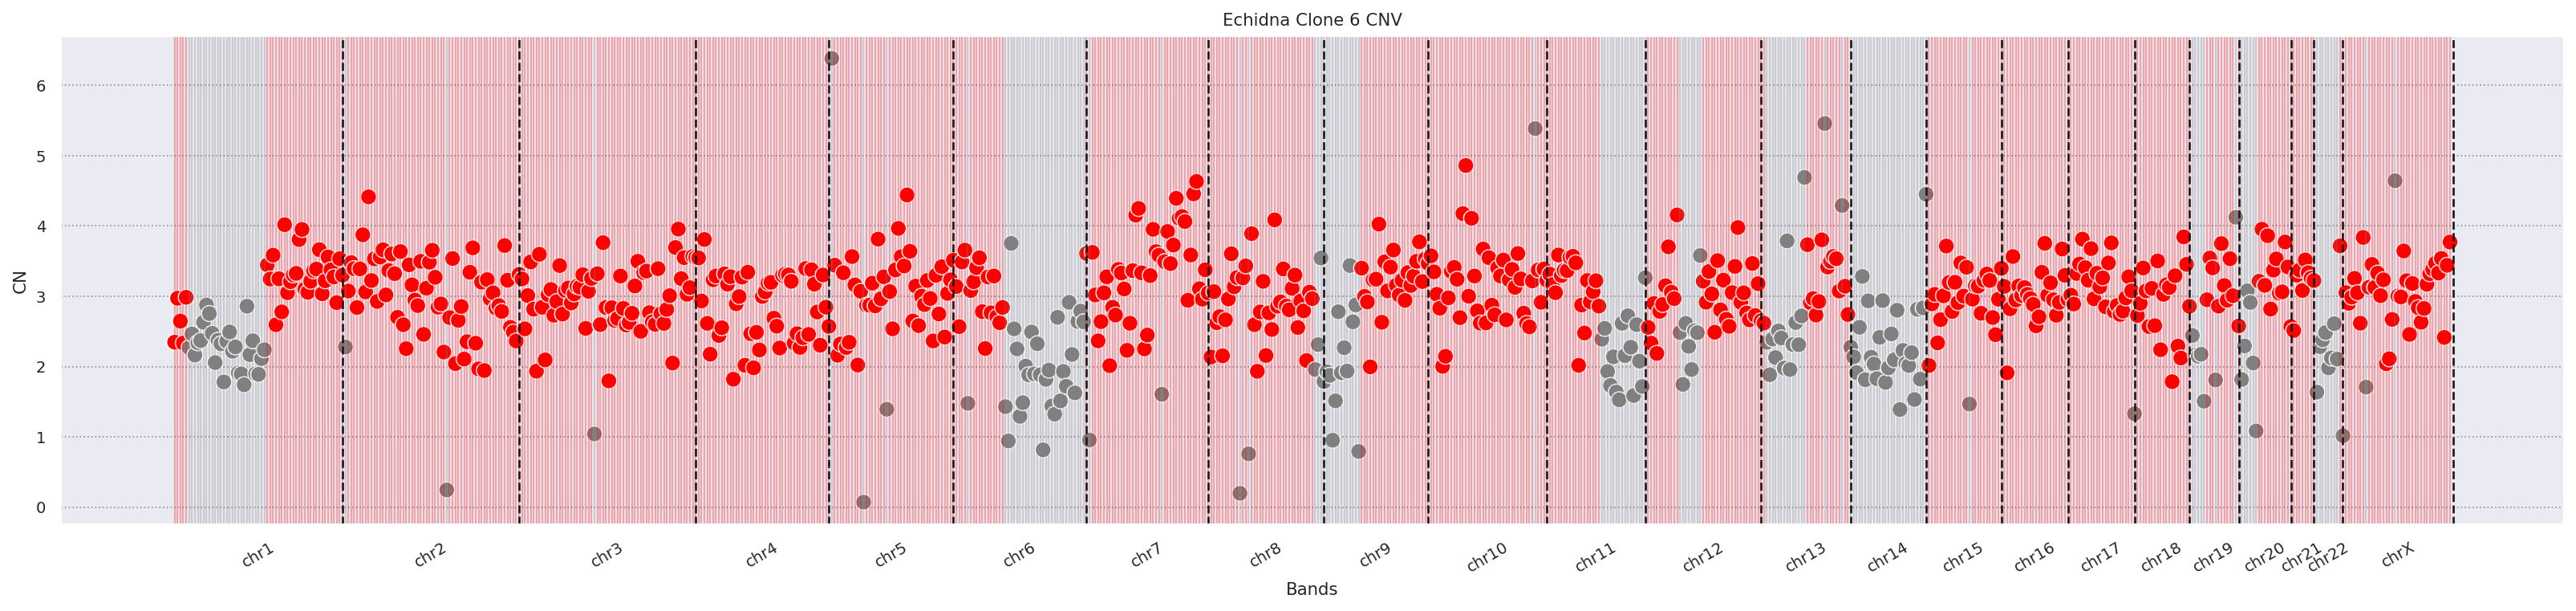

In [5]:
ec.pl.plot_cnv(adata, 6)

If you want to use your own genome, follow these guidelines:

In [6]:
import pandas as pd

In [7]:
bands = pd.read_csv(
    "https://hgdownload.soe.ucsc.edu/goldenPath/hg38/database/cytoBand.txt.gz",
    delimiter="\t",
    header=None,
    names=["chrom", "bandStart", "bandEnd", "band", "g"],
).dropna()
genes = pd.read_csv(
    "https://hgdownload.soe.ucsc.edu/goldenPath/hg38/database/wgEncodeGencodeCompV46.txt.gz",
    delimiter="\t",
    header=None,
    names=["gene_id", "transcript_id", "chrom", "strand", "txStart", "txEnd", "cdsStart", "cdsEnd", "exonCount", "exonStarts", "exonEnds", "score", "geneName", "cdsStartStat", "cdsEndStat", "exonFrames"],
)
genome = ec.tl.genes_to_bands(genes, bands)

The result is saved at the following link, which Echidna pulls from in the default setting. Make sure to match your DataFrame's column names to the ones above. Echidna will look for them in `genes_to_bands` and in  contains the same set of columns, as this is what `ec.tl.genes_to_bands` and `ec.tl.infer_cnv` will look for in your DataFrame.

`["chrom", "bandStart", "bandEnd", "band", "txStart", "txEnd", "geneName"]`

In [8]:
pd.read_csv("https://web.cs.ucla.edu/~wob/data/GRCh38_cytoband_gencodeV46.csv")

chrom         band  bandStart   bandEnd         geneName   txStart  \
0      chr1  chr1_p36.33          0   2300000          DDX11L2     11868   
1      chr1  chr1_p36.33          0   2300000        MIR6859-1     17368   
2      chr1  chr1_p36.33          0   2300000      MIR1302-2HG     29553   
3      chr1  chr1_p36.33          0   2300000        MIR1302-2     30365   
4      chr1  chr1_p36.33          0   2300000          FAM138A     34553   
...     ...          ...        ...       ...              ...       ...   
47971  chrY     chrY_q12   26600000  57227415            VAMP7  57067864   
47972  chrY     chrY_q12   26600000  57227415             IL9R  57184215   
47973  chrY     chrY_q12   26600000  57227415  ENSG00000292369  57190737   
47974  chrY     chrY_q12   26600000  57227415           WASIR1  57201142   
47975  chrY     chrY_q12   26600000  57227415           WASH6P  57207345   

          txEnd  weight  
0         14409     1.0  
1         17436     1.0  
2         31097     1.0  
3         30503     1.0  
4         36081     1.0  
...         ...     ...  
47971  57130289     1.0  
47972  57197337     1.0  
47973  57208756     1.0  
47974  57203357     1.0  
47975  57208935     1.0  

[47976 rows x 8 columns]

In [9]:
ec.tl.infer_cnv(adata, genome=genome)

2024-07-19 00:20:13,895 | INFO : Added `.uns['echidna']['save_data']['infer_cnv']` : Path to CNV inference results.


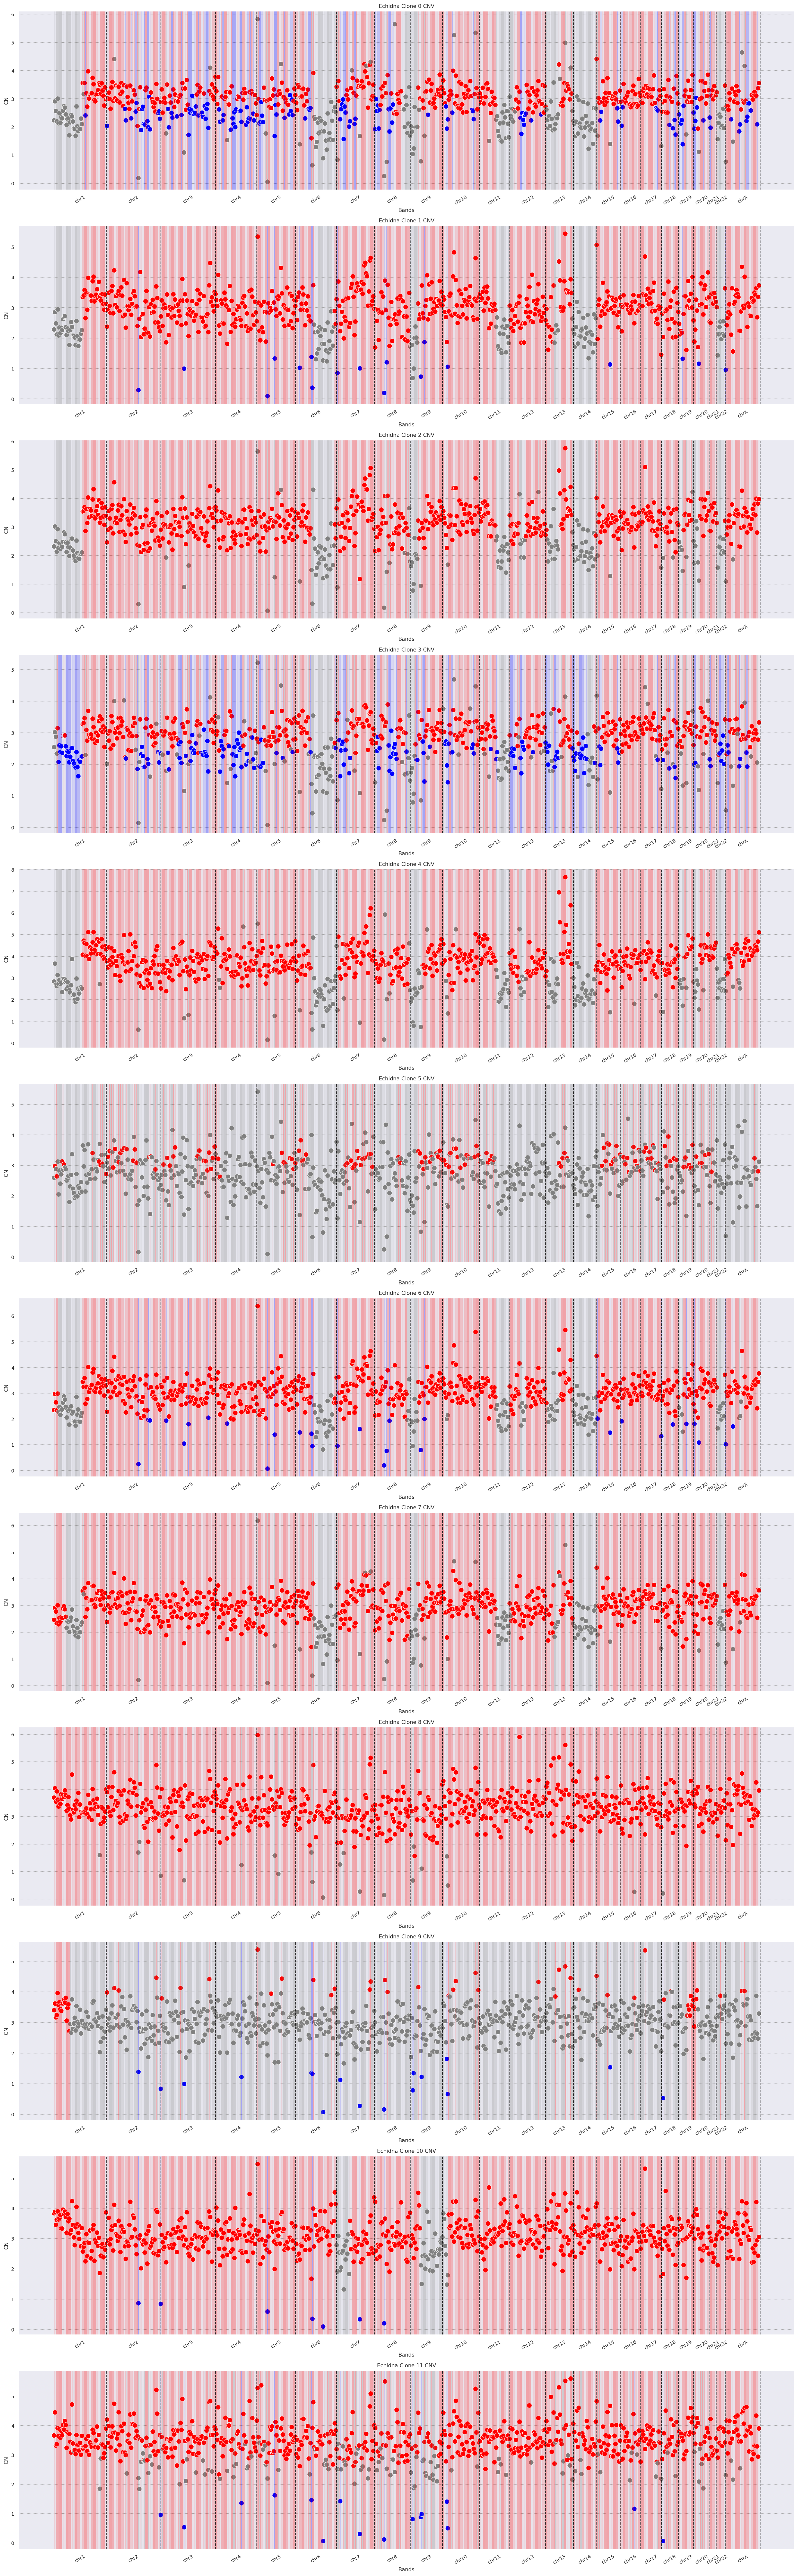

In [10]:
ec.pl.plot_cnv(adata)